In [1]:
!pip install GoogleNews

  Obtaining dependency information for GoogleNews from https://files.pythonhosted.org/packages/ae/07/312fc17525c04d19e1a24a32ece60462f12003aa7b8a38269a8ca8f9c801/GoogleNews-1.6.10-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/293.8 kB ? eta -:--:--
     - -------------------------------------- 10.2/293.8 kB ? eta -:--:--
     - -------------------------------------- 10.2/293.8 kB ? eta -:--:--
     --- --------------------------------- 30.7/293.8 kB 259.2 kB/s eta 0:00:02
     ----------- ------------------------- 92.2/293.8 kB 581.0 kB/s eta 0:00:01
     -------------------------------------  286.7/293.8 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 293.8/293.8 kB 1.5 MB/s eta 0:00:00
  Obtaining dependency information for regex!=2019.02.19,!=2021.8.27 from https://files.pythonhosted.org/packages/b8/ad/3398312096118c4e62a5827664e52a04d5068e84d04142dd4a0da8a567ae/regex-2023.10.3-cp311-cp311-win_amd64.whl.metadata
     ----------------

In [2]:
from GoogleNews import GoogleNews
googlenews = GoogleNews()

In [3]:
googlenews.set_lang('en')
googlenews.set_period('7d') #fetches 7 days ago
googlenews.set_encode('utf-8')

In [93]:
googlenews.get_news('Microsoft')

In [94]:
results = googlenews.results(sort=True)

In [95]:
results

[{'title': 'Microsoft says VBScript will be ripped from Windows in future release',
  'desc': None,
  'date': '5 hours ago',
  'datetime': datetime.datetime(2023, 10, 10, 19, 43, 39, 788235),
  'link': 'news.google.com/./articles/CBMiR2h0dHBzOi8vd3d3LnRoZXJlZ2lzdGVyLmNvbS8yMDIzLzEwLzEwL21pY3Jvc29mdF9zYXlzX3Zic2NyaXB0X3dpbGxfYmUv0gFLaHR0cHM6Ly93d3cudGhlcmVnaXN0ZXIuY29tL0FNUC8yMDIzLzEwLzEwL21pY3Jvc29mdF9zYXlzX3Zic2NyaXB0X3dpbGxfYmUv?hl=en-US&gl=US&ceid=US%3Aen',
  'img': 'https://lh3.googleusercontent.com/qrJOIHqB11pBtVLCiWD7iiV4QmELfNlqMT2PB1wN20ctcebViDKsDvv8jStrU2DYu0eMzpK2BQ=s0-h14-rp',
  'media': 'The Register',
  'site': None},
 {'title': 'What We Mean When We Say AI is “Usefully Wrong”',
  'desc': None,
  'date': '6 hours ago',
  'datetime': datetime.datetime(2023, 10, 10, 18, 43, 39, 790238),
  'link': 'news.google.com/./articles/CBMiVWh0dHBzOi8vd3d3Lm1pY3Jvc29mdC5jb20vZW4tdXMvd29ya2xhYi93aGF0LXdlLW1lYW4td2hlbi13ZS1zYXktYWktaXMtdXNlZnVsbHktd3JvbmfSAQA?hl=en-US&gl=US&ceid=US%3Aen'

In [96]:
last_captured = results[1]["date"] + ": " + results[1]["title"]
last_captured

'6 hours ago: What We Mean When We Say AI is “Usefully Wrong”'

In [97]:
len(results)

97

In [98]:
newsfeed = pd.DataFrame(results)

In [99]:
newsfeed["title"].head(6).drop_duplicates()

0    Microsoft says VBScript will be ripped from Wi...
1      What We Mean When We Say AI is “Usefully Wrong”
2    Momentum to Get Microsoft Teams Boost with G12...
3    Microsoft announces quarterly earnings release...
4    Microsoft Releases October 2023 Patch Tuesday ...
5    File Explorer in Windows 11: What users wanted...
Name: title, dtype: object

In [100]:
newsfeed.sort_values(by=["datetime"], ascending=False).head(1)

,title,desc,date,datetime,link,img,media,site
0,Microsoft says VBScript will be ripped from Wi...,None,5 hours ago,2023-10-10 19:43:39.788235,news.google.com/./articles/CBMiR2h0dHBzOi8vd3d...,https://lh3.googleusercontent.com/qrJOIHqB11pB...,The Register,None


In [106]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ------- ------------------------------- 30.7/151.4 kB 445.2 kB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 1.5 MB/s eta 0:00:00


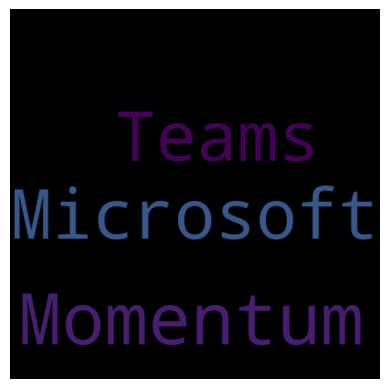

In [110]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = results[2]["title"]

wordcloud = WordCloud(width=480, height=480, max_words=3).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

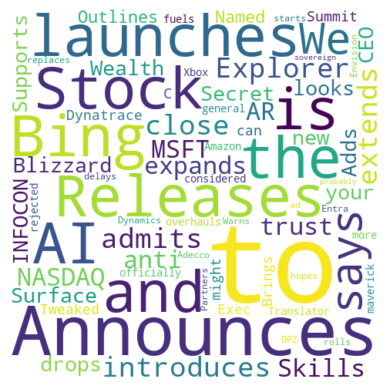

In [122]:
text = " ".join(line.split()[1] for line in newsfeed["title"])

wordcloud = WordCloud(width=480, height=480, stopwords = ("Microsoft", "Teams"), background_color= "white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [124]:
text

"says We to announces Releases Explorer admits close introduces Microsoft extends expands Skills Stock (NASDAQ:MSFT) anti-trust is Releases AR Teams Blizzard's launches Microsoft new Supports Teams Wealth Microsoft Microsoft AI drops Is Adds Microsoft 12 CEO your Bing to Secret Surface AI launches to Stock, looks Teams Microsoft INFOCON Outlines Microsoft Named Dynatrace Exec Announces Tweaked C# can Summit Brings might officially Translator fuels overhauls and rejected general considered Amazon to Xbox Microsoft maverick more Dynamics delays Adecco starts Partners to Warns Entra and Bing Envision ad (DPZ) Announces replaces rolls the hopes sovereign probably the 5"

In [127]:
!pip install nltk

In [128]:
>>> import nltk

>>> nltk.download([
...     "names",
...     "stopwords",
...     "state_union",
...     "twitter_samples",
...     "movie_reviews",
...     "averaged_perceptron_tagger",
...     "vader_lexicon",
...     "punkt",
... ])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\sanie.s.rojas.lobo\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Unzipping corpora\names.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanie.s.rojas.lobo\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\sanie.s.rojas.lobo\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Unzipping corpora\state_union.zip.
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\sanie.s.rojas.lobo\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Unzipping corpora\twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\sanie.s.rojas.lobo\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data] 

True

In [129]:
stopwords = nltk.corpus.stopwords.words("english")

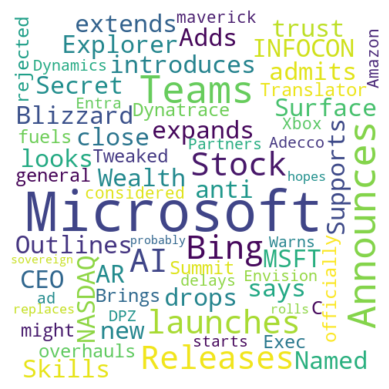

In [130]:
text = " ".join(line.split()[1] for line in newsfeed["title"])

wordcloud = WordCloud(width=480, height=480, stopwords = stopwords, background_color= "white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [133]:
frequency_distribution = nltk.FreqDist(text)
frequency_distribution

FreqDist({' ': 96, 's': 53, 'e': 53, 'o': 47, 'a': 38, 'r': 37, 't': 36, 'n': 35, 'c': 30, 'i': 28, ...})

In [156]:
text = " ".join(line.split()[1] for line in newsfeed["title"])
text

"says We to announces Releases Explorer admits close introduces Microsoft extends expands Skills Stock (NASDAQ:MSFT) anti-trust is Releases AR Teams Blizzard's launches Microsoft new Supports Teams Wealth Microsoft Microsoft AI drops Is Adds Microsoft 12 CEO your Bing to Secret Surface AI launches to Stock, looks Teams Microsoft INFOCON Outlines Microsoft Named Dynatrace Exec Announces Tweaked C# can Summit Brings might officially Translator fuels overhauls and rejected general considered Amazon to Xbox Microsoft maverick more Dynamics delays Adecco starts Partners to Warns Entra and Bing Envision ad (DPZ) Announces replaces rolls the hopes sovereign probably the 5"

In [170]:
words = [word for word in newsfeed["title"] if words not in stopwords]
words[5]

'File Explorer in Windows 11: What users wanted and what Microsoft ...'

In [165]:
frequency_distribution = nltk.FreqDist(words)
frequency_distribution

FreqDist({'Microsoft says VBScript will be ripped from Windows in future release': 1, 'What We Mean When We Say AI is “Usefully Wrong”': 1, 'Momentum to Get Microsoft Teams Boost with G12 Acquisition': 1, 'Microsoft announces quarterly earnings release date - Stories': 1, 'Microsoft Releases October 2023 Patch Tuesday Updates': 1, 'File Explorer in Windows 11: What users wanted and what Microsoft ...': 1, 'Microsoft admits defeat on its controversial OneDrive change': 1, 'Critically close to zero (day): Exploiting Microsoft Kernel streaming ...': 1, 'Microsoft introduces new data and AI solutions to help healthcare ...': 1, 'At Microsoft Dynamics Fall Analyst Event, New Insight on CRM ...': 1, ...})

In [185]:
words = " ".join([str(item) for item in newsfeed["title"]])
words

"Microsoft says VBScript will be ripped from Windows in future release What We Mean When We Say AI is “Usefully Wrong” Momentum to Get Microsoft Teams Boost with G12 Acquisition Microsoft announces quarterly earnings release date - Stories Microsoft Releases October 2023 Patch Tuesday Updates File Explorer in Windows 11: What users wanted and what Microsoft ... Microsoft admits defeat on its controversial OneDrive change Critically close to zero (day): Exploiting Microsoft Kernel streaming ... Microsoft introduces new data and AI solutions to help healthcare ... At Microsoft Dynamics Fall Analyst Event, New Insight on CRM ... Microsoft extends life support for aging Apache Cassandra 3.11 database Microsoft expands El Paso TechSpark economic development with ... Introducing Skills in Microsoft Viva, a new AI-powered service to ... Microsoft Stock Has Major Upside, Could Hit $410 On OpenAI Investment Payoff Microsoft (NASDAQ:MSFT) Is Very Good At Capital Allocation Microsoft's anti-trust

In [189]:
wts = str(words)

In [190]:
frequency_distribution = nltk.FreqDist(wts)
frequency_distribution

FreqDist({' ': 957, 'o': 504, 'e': 447, 't': 414, 'i': 383, 's': 364, 'r': 337, 'a': 299, 'n': 288, 'c': 216, ...})

In [191]:
from nltk.tokenize import word_tokenize

In [193]:
word_tokens = word_tokenize(wts)
word_tokens

['Microsoft',
 'says',
 'VBScript',
 'will',
 'be',
 'ripped',
 'from',
 'Windows',
 'in',
 'future',
 'release',
 'What',
 'We',
 'Mean',
 'When',
 'We',
 'Say',
 'AI',
 'is',
 '“',
 'Usefully',
 'Wrong',
 '”',
 'Momentum',
 'to',
 'Get',
 'Microsoft',
 'Teams',
 'Boost',
 'with',
 'G12',
 'Acquisition',
 'Microsoft',
 'announces',
 'quarterly',
 'earnings',
 'release',
 'date',
 '-',
 'Stories',
 'Microsoft',
 'Releases',
 'October',
 '2023',
 'Patch',
 'Tuesday',
 'Updates',
 'File',
 'Explorer',
 'in',
 'Windows',
 '11',
 ':',
 'What',
 'users',
 'wanted',
 'and',
 'what',
 'Microsoft',
 '...',
 'Microsoft',
 'admits',
 'defeat',
 'on',
 'its',
 'controversial',
 'OneDrive',
 'change',
 'Critically',
 'close',
 'to',
 'zero',
 '(',
 'day',
 ')',
 ':',
 'Exploiting',
 'Microsoft',
 'Kernel',
 'streaming',
 '...',
 'Microsoft',
 'introduces',
 'new',
 'data',
 'and',
 'AI',
 'solutions',
 'to',
 'help',
 'healthcare',
 '...',
 'At',
 'Microsoft',
 'Dynamics',
 'Fall',
 'Analyst',
 'E

In [194]:
frequency_distribution = nltk.FreqDist(word_tokens)
frequency_distribution

FreqDist({'Microsoft': 92, '...': 38, 'to': 28, ',': 23, 'for': 16, 'AI': 13, 'and': 13, "'s": 13, 'in': 12, ':': 11, ...})

In [198]:
word_tokens_nstw = [word for word in word_tokens if word not in stopwords]
word_tokens_nstw

['Microsoft',
 'says',
 'VBScript',
 'ripped',
 'Windows',
 'future',
 'release',
 'What',
 'We',
 'Mean',
 'When',
 'We',
 'Say',
 'AI',
 '“',
 'Usefully',
 'Wrong',
 '”',
 'Momentum',
 'Get',
 'Microsoft',
 'Teams',
 'Boost',
 'G12',
 'Acquisition',
 'Microsoft',
 'announces',
 'quarterly',
 'earnings',
 'release',
 'date',
 '-',
 'Stories',
 'Microsoft',
 'Releases',
 'October',
 '2023',
 'Patch',
 'Tuesday',
 'Updates',
 'File',
 'Explorer',
 'Windows',
 '11',
 ':',
 'What',
 'users',
 'wanted',
 'Microsoft',
 '...',
 'Microsoft',
 'admits',
 'defeat',
 'controversial',
 'OneDrive',
 'change',
 'Critically',
 'close',
 'zero',
 '(',
 'day',
 ')',
 ':',
 'Exploiting',
 'Microsoft',
 'Kernel',
 'streaming',
 '...',
 'Microsoft',
 'introduces',
 'new',
 'data',
 'AI',
 'solutions',
 'help',
 'healthcare',
 '...',
 'At',
 'Microsoft',
 'Dynamics',
 'Fall',
 'Analyst',
 'Event',
 ',',
 'New',
 'Insight',
 'CRM',
 '...',
 'Microsoft',
 'extends',
 'life',
 'support',
 'aging',
 'Apache',

In [196]:
frequency_distribution = nltk.FreqDist(word_tokens_nstw)
frequency_distribution

FreqDist({'Microsoft': 92, '...': 38, ',': 23, 'AI': 13, "'s": 13, ':': 11, 'new': 9, 'Windows': 8, 'Teams': 6, 'Bing': 6, ...})